![example](images/House-Sales.jpeg)

# Property sales analysis in King County

**Authors:** Ngoc Ho
***

## Overview
This project will build a multiple linear regression model to predict house prices in King County, Seattle, WA. The model will be derived from King County house sale dataset. 

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

A Seattle realestate company wants to establish an evaluation system for houses to provide a price appraisal and selling strategies to their clients. Having an accurate house price predictor will help the company build their reputation by gaining invaluable trust from their clients. For the client, this will help maximise their selling/investing potentials and for the compant this will help increase their client number and increase commission. 

The main data analysis questions we will be focusing on are:
1. What features add value to properties?
2. Does renovation add to property value?
3. Does neighbourhood add values to property?

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn import metrics
import pickle

%matplotlib inline

**Data Exploration**

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

**Checking for duplicates**

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**Columns with null values: waterfront, view and yr_renovated.
They need to be dealt with before regression analysis because regression will not work with null values. We will also convert all categorical values to numeric values to allow regression model to work.
Since most of values in these columns are 0, we will replace all nulls to 'No'**

In [7]:
#waterfront 
df.waterfront.unique()

array([nan,  0.,  1.])

In [8]:
df.waterfront.fillna(0,inplace=True)
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [9]:
#view
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [10]:
df.view.fillna(0,inplace=True)
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [11]:
#yr_renovated
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [12]:
#replacing all year number to 1 for it has been renovated
year= [ 1991., 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.]
df.yr_renovated.replace([year], 1, inplace=True)

In [13]:
#replacing all nulls to 0
df.yr_renovated.fillna(0,inplace=True)
df.yr_renovated.value_counts()

0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

In [14]:
#date
#separating date sold in separate columns with numerical values
df['date_clean'] = pd.to_datetime(df['date'])
df['day_sold'] = df['date_clean'].map(lambda x: x.day)
df['month_sold'] = df['date_clean'].map(lambda x: x.month)
df['year_sold'] = df['date_clean'].map(lambda x: x.year)

In [15]:
#sqft_basement
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [16]:
#replacing ? value to 0 and convert data type to float
df['sqft_basement'] = df["sqft_basement"].replace({"?": "0"})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [17]:
#Dropping date and 'date_clean' columns as we don't need them anymore 
df.drop(['date', 'date_clean'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

Now that we have all our variable in numerical values, let's check each independent's distribution, their linearity and correlation with price so we can narrow down the significant variables. 

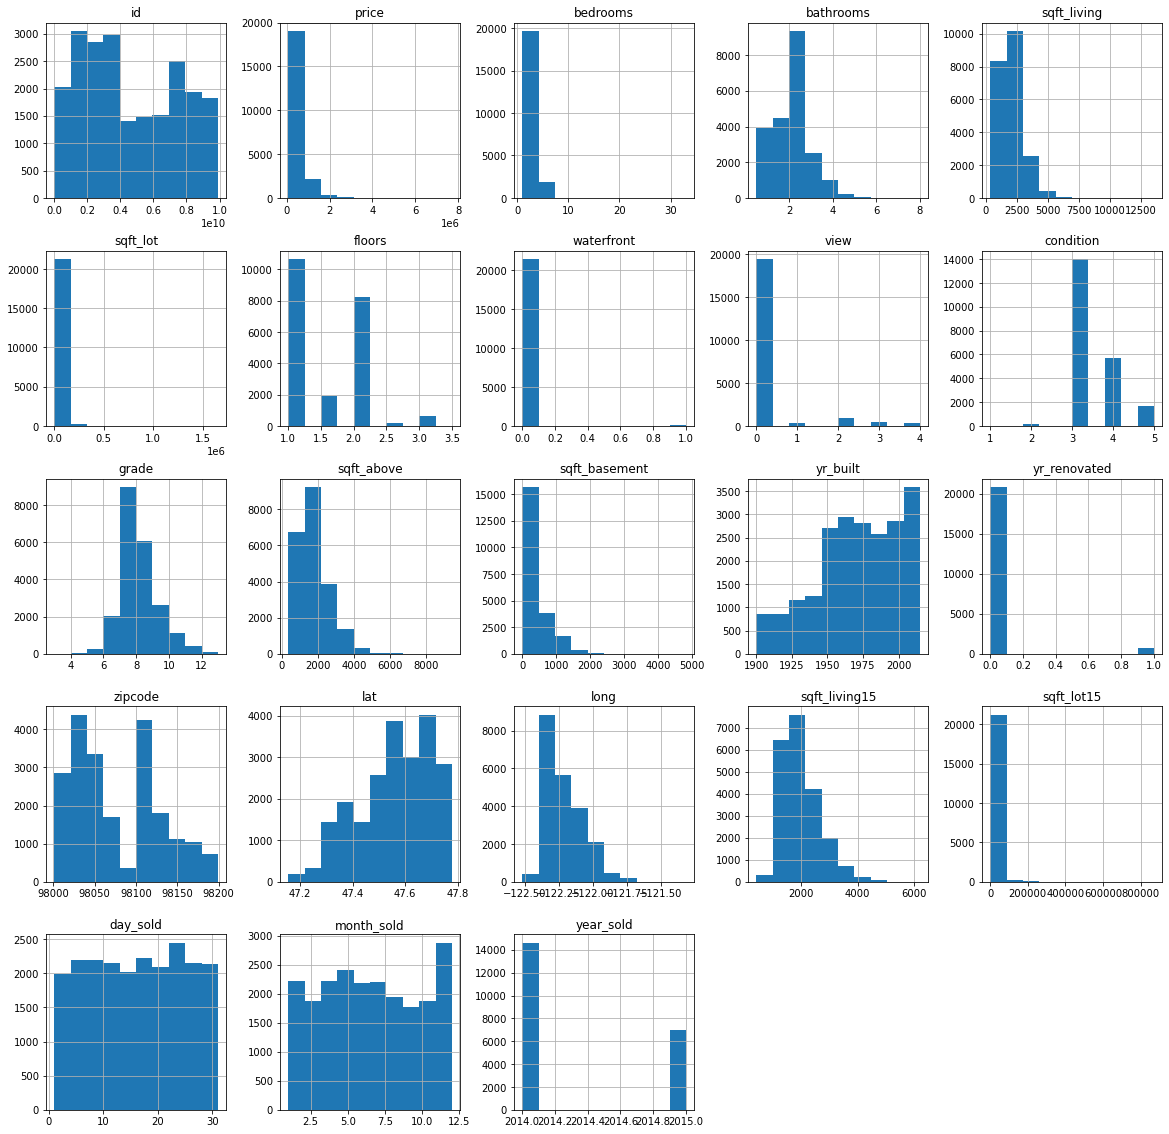

In [18]:
#distributions using histogram
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax);

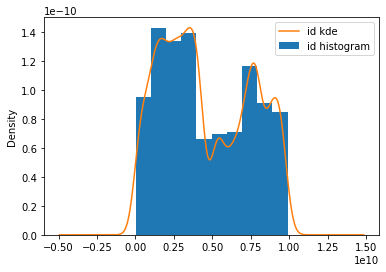

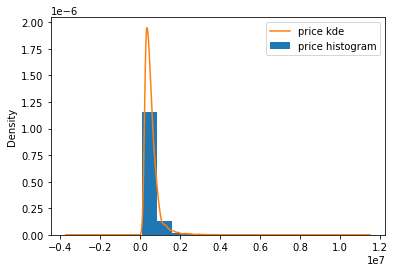

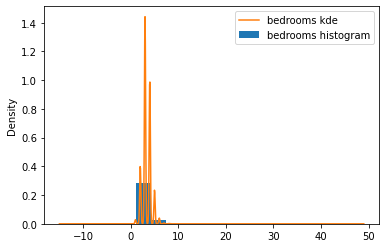

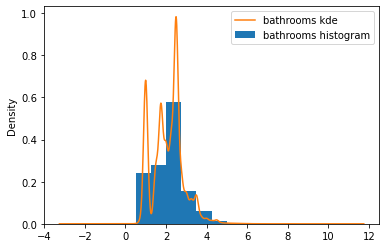

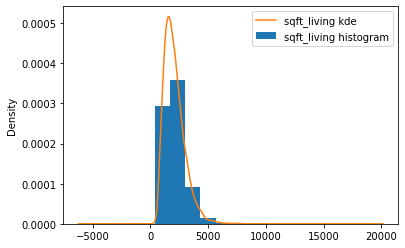

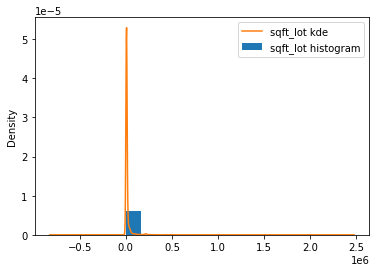

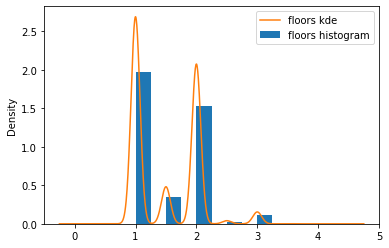

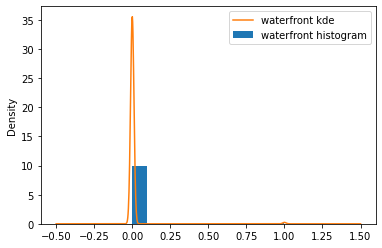

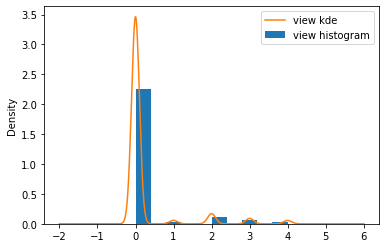

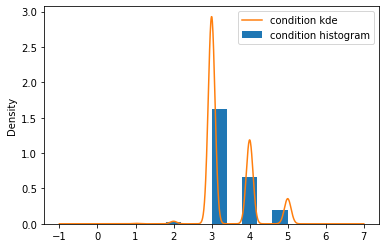

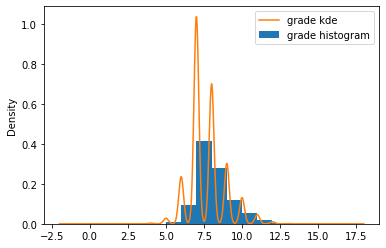

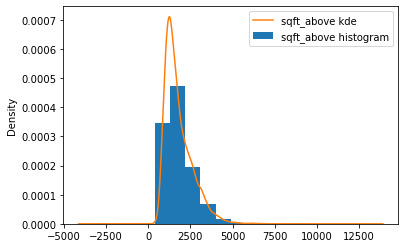

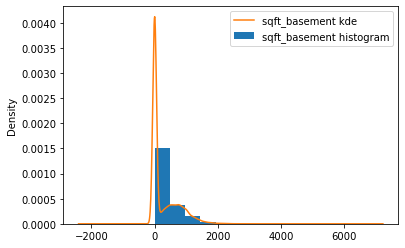

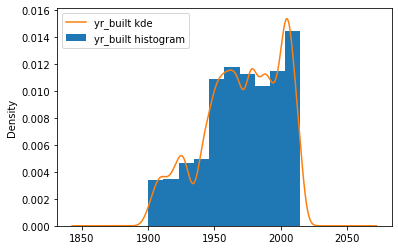

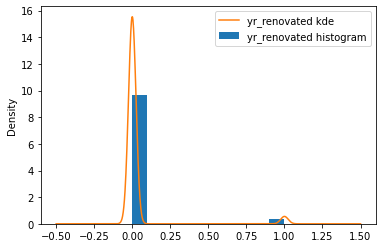

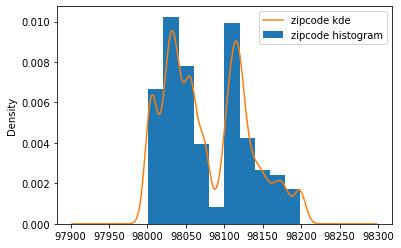

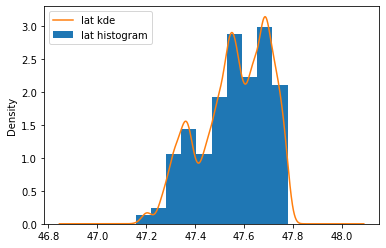

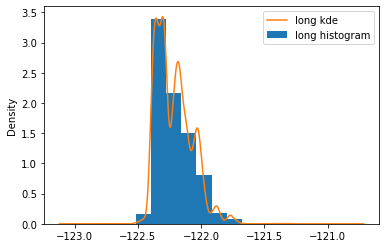

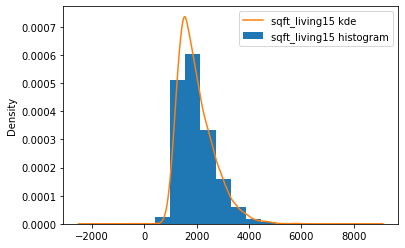

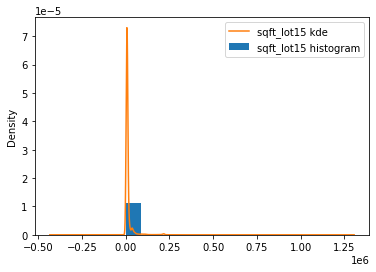

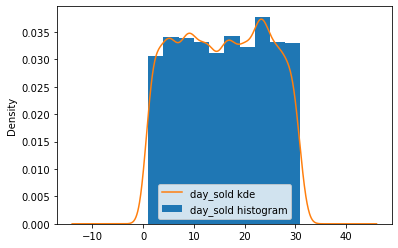

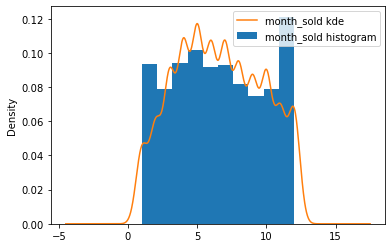

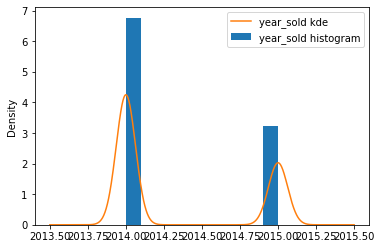

In [19]:
#KDE plots
for column in df:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

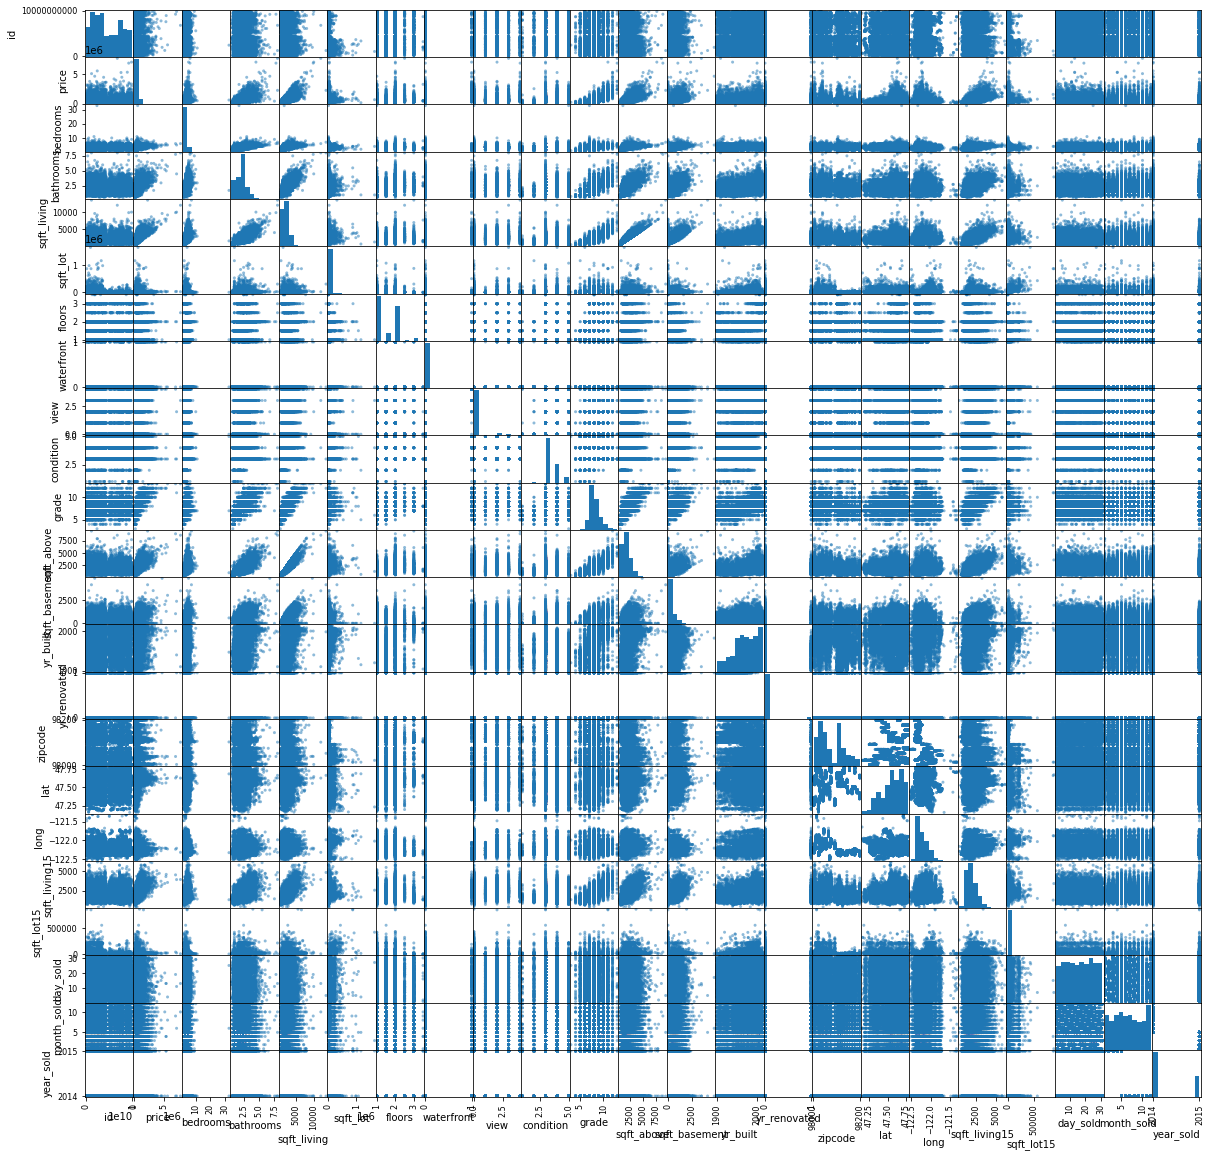

In [20]:
#scatter plot
pd.plotting.scatter_matrix(df,figsize  = [20, 20]);
plt.show()

From histogram and KDE plots, it seems that most continuous variable are somewhat normally distributed.

**Baseline Model**

Let's build a baseline model with all independent variables included to filter out significant features and also to have a baseline for comparisons of later models. 

In [21]:
#Baseline model
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2308.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:38:09   Log-Likelihood:            -2.9432e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21574   BIC:                         5.889e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.679e+07   9.97e+06     -6.699      0.000   -8.63e+07   -4.72e+07
id            -1.349e-06   4.81e-07     -2.802      0.005   -2.29e-06   -4.05e-07
bedrooms      -3.611e+04   1895.492    -19.051      0.000   -3.98e+04   -3.24e+04
bathrooms      4.188e+04   3253.716     12.871      0.000    3.55e+04    4.83e+04
sqft_living     103.7713     18.027      5.756      0.000      68.437     139.105
sqft_lot          0.1176      0.048      2.457      0.014       0.024       0.211
floors         7650.4990   3591.439      2.130      0.033     611.013    1.47e+04
waterfront     6.188e+05   1.81e+04     34.211      0.000    5.83e+05    6.54e+05
view           5.317e+04   2117.373     25.109      0.000     4.9e+04    5.73e+04
condition      2.804e+04   2344.312     11.959      0.000    2.34e+04    3.26e+04
grade          9.727e+04   2155.487     45.126      0.000     9.3e+04    1.01e+05
sqft_above       77.0543     18.018      4.276      0.000      41.737     112.372
sqft_basement    46.9031     17.858      2.626      0.009      11.900      81.907
yr_built      -2641.1743     71.733    -36.820      0.000   -2781.775   -2500.573
yr_renovated   4.836e+04   7919.305      6.107      0.000    3.28e+04    6.39e+04
zipcode        -584.8477     32.902    -17.776      0.000    -649.338    -520.358
lat            6.026e+05   1.07e+04     56.257      0.000    5.82e+05    6.24e+05
long          -2.155e+05   1.31e+04    -16.403      0.000   -2.41e+05    -1.9e+05
sqft_living15    21.5336      3.441      6.258      0.000      14.789      28.279
sqft_lot15       -0.4006      0.073     -5.463      0.000      -0.544      -0.257
day_sold       -360.8515    159.165     -2.267      0.023    -672.827     -48.876
month_sold     1129.2739    708.781      1.593      0.111    -259.988    2518.536
year_sold      3.656e+04   4721.714      7.744      0.000    2.73e+04    4.58e+04
==============================================================================
Omnibus:                    18404.912   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1877255.867
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.111   Cond. No.                     3.95e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X_0 = df.drop('price', axis=1)
y_0 = df['price']
X0_train, X0_test, y0_train, y0_test = train_test_split(X_0,y_0, random_state=141)
model_0 = LinearRegression()
model_0.fit(X0_train, y0_train)

y0_hat_train = model_0.predict(X0_train)
y0_hat_test = model_0.predict(X0_test)

from sklearn.metrics import mean_squared_error
train_mse_0 = mean_squared_error(y0_train, y0_hat_train)
test_mse_0 = mean_squared_error(y0_test, y0_hat_test)
RSME_0 = test_mse_0 - train_mse_0
print('Train Mean Squared Error:', train_mse_0)
print('Test Mean Squared Error:', test_mse_0)
print('RMSE:', RSME_0)

Train Mean Squared Error: 39840669485.17209
Test Mean Squared Error: 41797948107.958405
RMSE: 1957278622.786316


In [23]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [24]:
predictors = df.drop('price', axis=1)
result = stepwise_selection(predictors, df['price'], verbose=True)
print('resulting features:')
print(result)

Add  lat                            with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  floors                         with p-value 0.0
Add  sqft_living                    with p-value 0.0


ValueError: list.remove(x): x not in list

From stepwise selection process we filter out the significant features. Let's examine their correlation with price.

In [ ]:
#correllation
df.corr()

In [ ]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

good_corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
good_corr_df['pairs'] = list(zip(good_corr_df.level_0, good_corr_df.level_1))

# set index to pairs
good_corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
good_corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
good_corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
good_corr_df.drop_duplicates(inplace=True)
good_corr_df[(good_corr_df.cc>.30) & (good_corr_df.cc <1)]

From above pairs we can see features with good positive linear correlation with price are: sqft_living, grade, sqft_above, sqft_living15 and bathrooms. Also from our model summmary table, all these 5 independent variables have significant p=value, meaning they have significant effect on our dependent variable (property price). However, the condition number is very high which suggested there are alot of multicollinearity or orther problems. Let's check for multicollinearity for these 5 variables. 

In [27]:
#Clean up our data frame by removing all uneccessary variables
df_prep = df.drop(['sqft_lot','floors', 'waterfront', 'condition',
                   'yr_built', 'yr_renovated', 'zipcode', 'long',
                   'sqft_lot15', 'day_sold', 'month_sold', 'year_sold'], axis=1)
df_prep

id     price  bedrooms  bathrooms  sqft_living  view  grade  \
0      7129300520  221900.0         3       1.00         1180   0.0      7   
1      6414100192  538000.0         3       2.25         2570   0.0      7   
2      5631500400  180000.0         2       1.00          770   0.0      6   
3      2487200875  604000.0         4       3.00         1960   0.0      7   
4      1954400510  510000.0         3       2.00         1680   0.0      8   
...           ...       ...       ...        ...          ...   ...    ...   
21592   263000018  360000.0         3       2.50         1530   0.0      8   
21593  6600060120  400000.0         4       2.50         2310   0.0      8   
21594  1523300141  402101.0         2       0.75         1020   0.0      7   
21595   291310100  400000.0         3       2.50         1600   0.0      8   
21596  1523300157  325000.0         2       0.75         1020   0.0      7   

       sqft_above  sqft_basement      lat  sqft_living15  
0            1180            0.0  47.5112           1340  
1            2170          400.0  47.7210           1690  
2             770            0.0  47.7379           2720  
3            1050          910.0  47.5208           1360  
4            1680            0.0  47.6168           1800  
...           ...            ...      ...            ...  
21592        1530            0.0  47.6993           1530  
21593        2310            0.0  47.5107           1830  
21594        1020            0.0  47.5944           1020  
21595        1600            0.0  47.5345           1410  
21596        1020            0.0  47.5941           1020  

[21597 rows x 11 columns]

Build a simple model for each of the selected independent variable to see if they satisfy linear regression requirements.

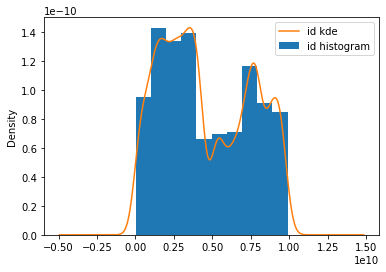

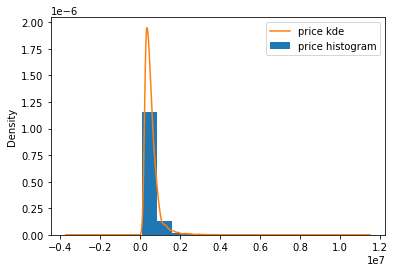

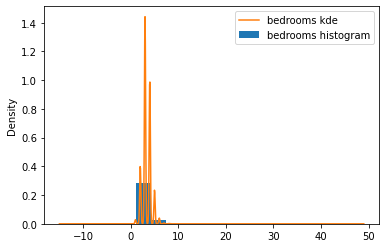

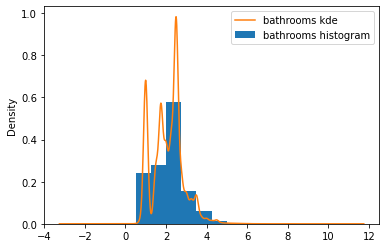

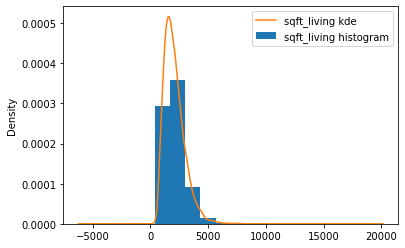

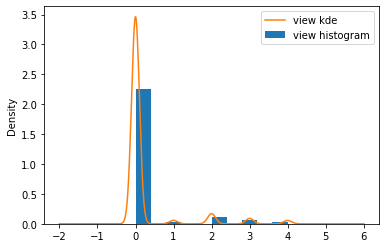

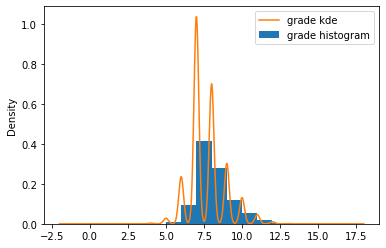

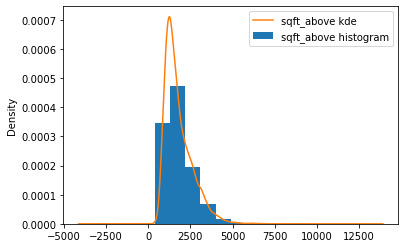

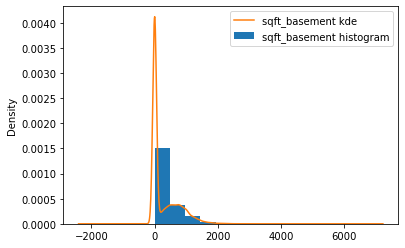

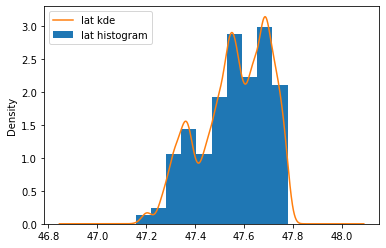

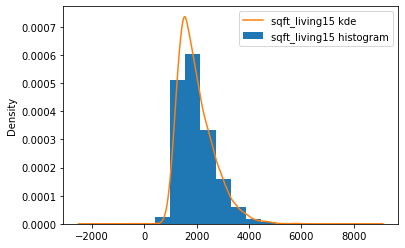

In [28]:
#Plot histograms with kde overlay to check the distribution of the predictors
for column in df_prep:
    df_prep[column].plot.hist(density=True, label = column+' histogram')
    df_prep[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

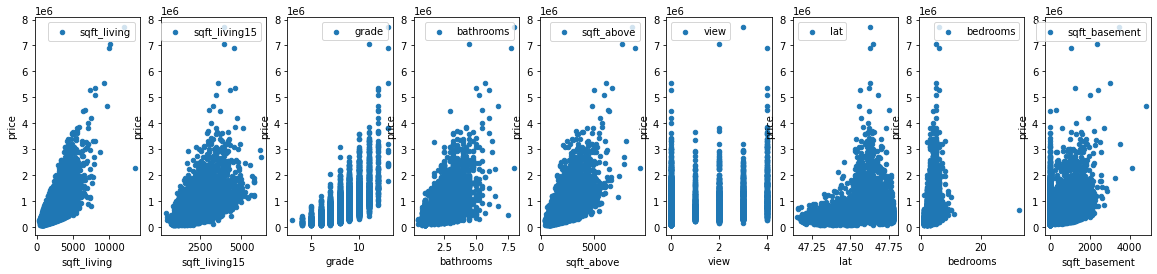

In [29]:
fig_1, axes = plt.subplots(figsize=(20,4), ncols=9)
for idx, channel in enumerate(['sqft_living', 'sqft_living15', 'grade', 'bathrooms', 'sqft_above', 'view', 'lat',
                              'bedrooms', 'sqft_basement']):
    df_prep.plot(kind='scatter', x=channel, y='price', ax=axes[idx], label=channel)
plt.legend()
plt.show()

From our histograms and scatter plots it looks like our features have roughly satisfy linearity with our dependent variable (price). Let's build a model on these features and evaluate it.

**Model 1**
- This model has 5 significant features selected based on their linear relationship with price using histograms, scatter plots, correlation coeficient and stepwise selection process.

In [41]:
# Model 1 with selected significant features 
outcome = 'price'
predictors = df_cleaned.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_1 = ols(formula=formula, data=df_cleaned).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     2653.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:59:53   Log-Likelihood:            -2.4892e+05
No. Observations:               18945   AIC:                         4.979e+05
Df Residuals:                   18934   BIC:                         4.980e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.817e+07   3.04e+05    -92.577      0.000   -2.88e+07   -2.76e+07
id            -1.205e-07   3.12e-07     -0.387      0.699   -7.32e-07    4.91e-07
bedrooms      -3772.7737   1275.829     -2.957      0.003   -6273.513   -1272.035
bathrooms     -9871.1773   1961.333     -5.033      0.000   -1.37e+04   -6026.789
sqft_living     108.1280     12.934      8.360      0.000      82.777     133.479
view           4.539e+04   1516.515     29.931      0.000    4.24e+04    4.84e+04
grade          6.152e+04   1574.793     39.065      0.000    5.84e+04    6.46e+04
sqft_above      -19.5701     12.855     -1.522      0.128     -44.767       5.627
sqft_basement    -3.0226     12.862     -0.235      0.814     -28.233      22.188
lat            5.879e+05   6416.688     91.623      0.000    5.75e+05       6e+05
sqft_living15    35.0811      2.493     14.073      0.000      30.195      39.967
==============================================================================
Omnibus:                     2238.569   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3934.891
Skew:                           0.800   Prob(JB):                         0.00
Kurtosis:                       4.558   Cond. No.                     1.85e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
X_1 = df_cleaned.drop('price', axis=1)
y_1 = df_cleaned['price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1,y_1, random_state=34)
model_1k = LinearRegression()
model_1k.fit(X1_train, y1_train)

y1_hat_train = model_1k.predict(X1_train)
y1_hat_test = model_1k.predict(X1_test)

from sklearn.metrics import mean_squared_error
train_mse_1 = mean_squared_error(y1_train, y1_hat_train)
test_mse_1 = mean_squared_error(y1_test, y1_hat_test)
RSME_1 = test_mse_1 - train_mse_1
print('Train Mean Squared Error:', train_mse_1)
print('Test Mean Squared Error:', test_mse_1)
print('RMSE:', RSME_1)

Train Mean Squared Error: 15078127084.081944
Test Mean Squared Error: 15335389371.61302
RMSE: 257262287.53107643


**Visualize the error term for variance and heteroscedasticity**

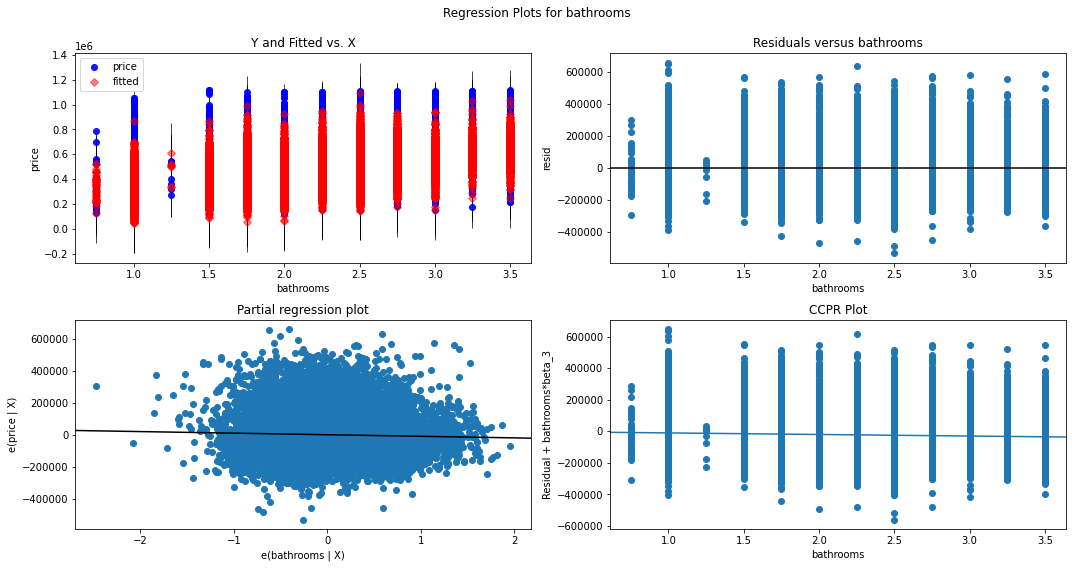

In [52]:
#Bathrooms
fig_2 = plt.figure(figsize=(15,8))
fig_2 = sm.graphics.plot_regress_exog(model_1,'bathrooms',fig=fig_2)
plt.show()

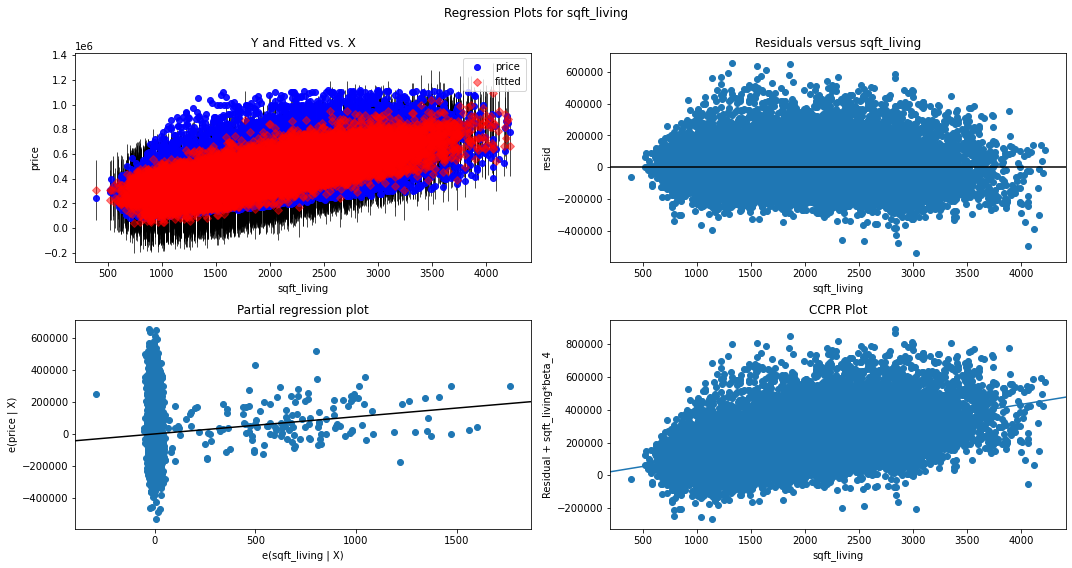

In [53]:
#sqft_living
fig_3 = plt.figure(figsize=(15,8))
fig_3 = sm.graphics.plot_regress_exog(model_1,'sqft_living',fig=fig_3)
plt.show()

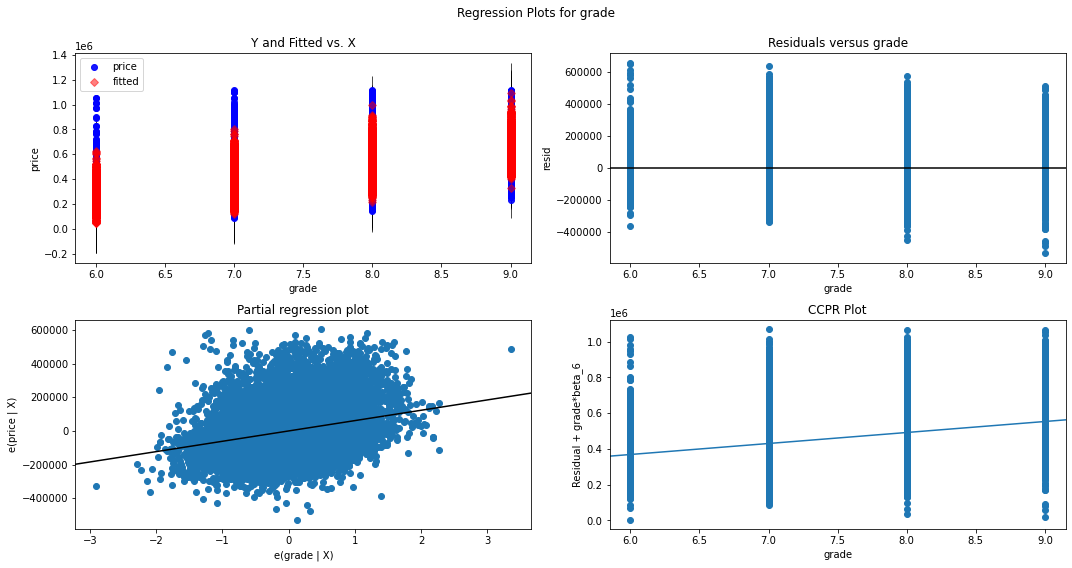

In [54]:
#grade
fig_4 = plt.figure(figsize=(15,8))
fig_4 = sm.graphics.plot_regress_exog(model_1,'grade',fig=fig_4)
plt.show()

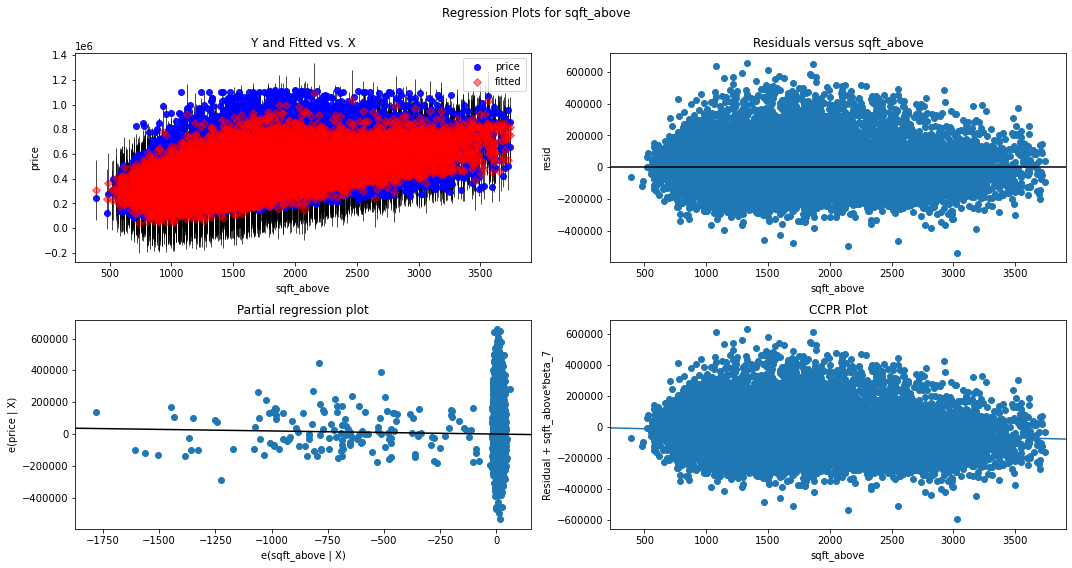

In [55]:
#sqft_above
fig_5 = plt.figure(figsize=(15,8))
fig_5 = sm.graphics.plot_regress_exog(model_1,'sqft_above',fig=fig_5)
plt.show()

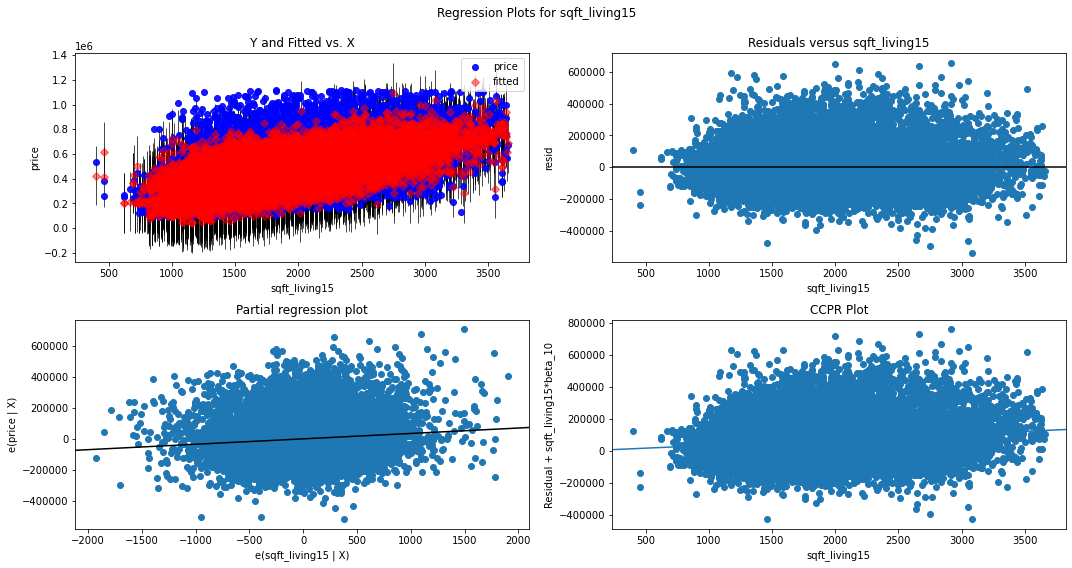

In [56]:
#sqft_living15
fig_6 = plt.figure(figsize=(15,8))
fig_6 = sm.graphics.plot_regress_exog(model_1,'sqft_living15',fig=fig_6)
plt.show()

From residuals plot above, it looks like all our features have heteroscedasticity, violating the homoscedasticity assumption.

**Check the normality assumptions by creating a QQ-plot**

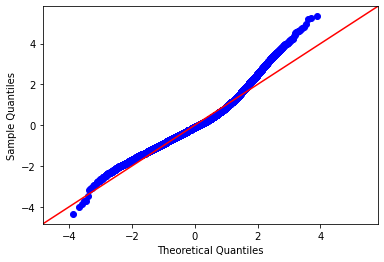

In [57]:
residuals = model_1.resid
fig_7 = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig_7.show()

QQ plot suggests violation of normality assumption.

Our adjusted R2 is 0.545 is not great meaning that the model can only explain about 55% of the prices in property sales. Our JB score is also very high suggesting our features has strong multicollinearity or other numerical problems. Let's check our features for outliers and multicollinearity. 

**Removing outliers**

In [58]:
df_prep.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

               view         grade    sqft_above  sqft_basement           lat  \
count  21597.000000  21597.000000  21597.000000   21597.000000  21597.000000   
mean       0.233181      7.657915   1788.596842     285.716581     47.560093   
std        0.764673      1.173200    827.759761     439.819830      0.138552   
min        0.000000      3.000000    370.000000       0.000000     47.155900   
25%        0.000000      7.000000   1190.000000       0.000000     47.471100   
50%        0.000000      7.000000   1560.000000       0.000000     47.571800   
75%        0.000000      8.000000   2210.000000     550.000000     47.678000   
max        4.000000     13.000000   9410.000000    4820.000000     47.777600   

       sqft_living15  
count   21597.000000  
mean     1986.620318  
std       685.230472  
min       399.000000  
25%      1490.000000  
50%      1840.000000  
75%      2360.000000  
max      6210.000000

In [59]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

index_list = []
for feature in ['price','bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']:
    index_list.extend(outliers(df_prep, feature))

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
df_cleaned = remove(df_prep, index_list)
df_cleaned.shape

(18945, 11)

In [60]:
df_prep.shape

(21597, 11)

**Checking for multicollinearity**

In [61]:
df_cleaned.corr()

id     price  bedrooms  bathrooms  sqft_living      view  \
id             1.000000  0.017558  0.007541   0.032413     0.013558  0.019047   
price          0.017558  1.000000  0.248520   0.372889     0.541732  0.235657   
bedrooms       0.007541  0.248520  1.000000   0.445163     0.579748  0.028392   
bathrooms      0.032413  0.372889  0.445163   1.000000     0.675731  0.071846   
sqft_living    0.013558  0.541732  0.579748   0.675731     1.000000  0.154044   
view           0.019047  0.235657  0.028392   0.071846     0.154044  1.000000   
grade          0.039260  0.543052  0.276759   0.582019     0.629443  0.119502   
sqft_above     0.018072  0.417324  0.440235   0.589943     0.808793  0.043620   
sqft_basement -0.005017  0.250192  0.274975   0.204830     0.401989  0.186116   
lat            0.005110  0.453589 -0.045317  -0.032411    -0.012932 -0.024276   
sqft_living15  0.011371  0.476125  0.355448   0.487229     0.695846  0.180618   

                  grade  sqft_above  sqft_basement       lat  sqft_living15  
id             0.039260    0.018072      -0.005017  0.005110       0.011371  
price          0.543052    0.417324       0.250192  0.453589       0.476125  
bedrooms       0.276759    0.440235       0.274975 -0.045317       0.355448  
bathrooms      0.582019    0.589943       0.204830 -0.032411       0.487229  
sqft_living    0.629443    0.808793       0.401989 -0.012932       0.695846  
view           0.119502    0.043620       0.186116 -0.024276       0.180618  
grade          1.000000    0.633770       0.062079  0.065475       0.597203  
sqft_above     0.633770    1.000000      -0.203310 -0.084017       0.659629  
sqft_basement  0.062079   -0.203310       1.000000  0.109014       0.131755  
lat            0.065475   -0.084017       0.109014  1.000000      -0.008469  
sqft_living15  0.597203    0.659629       0.131755 -0.008469       1.000000

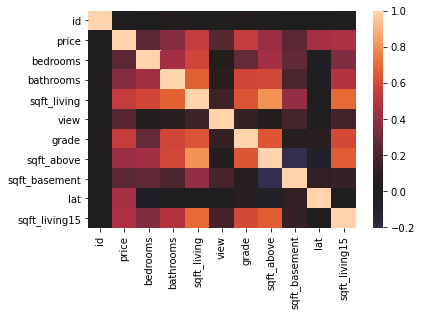

In [62]:
import seaborn as sns
sns.heatmap(df_cleaned.corr(), center=0);

In [63]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_1=df_cleaned.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_1['pairs'] = list(zip(df_1.level_0, df_1.level_1))

# set index to pairs
df_1.set_index(['pairs'], inplace = True)

#d rop level columns
df_1.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_1.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.

df_1.drop_duplicates(inplace=True)
df_1[(df_1.cc>.75) & (df_1.cc <1)]

cc
pairs                              
(sqft_above, sqft_living)  0.808793

In [64]:
#removing sqft_above to remove multicollinearity
non_colin_df = df_cleaned.drop(['sqft_above'], axis=1)
non_colin_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade',
       'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

**Model 2**
- This model is built on 4 significant features with outliers and multicollinearity removed. 

In [65]:
outcome = 'price'
predictors = non_colin_df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_2 = ols(formula=formula, data=non_colin_df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     2947.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:02:39   Log-Likelihood:            -2.4892e+05
No. Observations:               18945   AIC:                         4.979e+05
Df Residuals:                   18935   BIC:                         4.979e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.818e+07   3.04e+05    -92.630      0.000   -2.88e+07   -2.76e+07
id            -1.222e-07   3.12e-07     -0.392      0.695   -7.33e-07    4.89e-07
bedrooms      -3733.4274   1275.612     -2.927      0.003   -6233.740   -1233.114
bathrooms     -9883.9555   1961.384     -5.039      0.000   -1.37e+04   -6039.468
sqft_living      88.8883      2.750     32.328      0.000      83.499      94.278
view           4.547e+04   1515.643     30.001      0.000    4.25e+04    4.84e+04
grade          6.142e+04   1573.591     39.034      0.000    5.83e+04    6.45e+04
sqft_basement    16.1297      2.676      6.028      0.000      10.885      21.374
lat            5.881e+05   6415.180     91.680      0.000    5.76e+05    6.01e+05
sqft_living15    34.9391      2.491     14.025      0.000      30.056      39.822
==============================================================================
Omnibus:                     2236.460   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3928.692
Skew:                           0.799   Prob(JB):                         0.00
Kurtosis:                       4.556   Cond. No.                     1.85e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
X_2 = non_colin_df.drop('price', axis=1)
y_2 = non_colin_df['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2,y_2, random_state=3)
model_2k = LinearRegression()
model_2k.fit(X2_train, y2_train)

y2_hat_train = model_2k.predict(X2_train)
y2_hat_test = model_2k.predict(X2_test)

from sklearn.metrics import mean_squared_error
train_mse_2 = mean_squared_error(y2_train, y2_hat_train)
test_mse_2 = mean_squared_error(y2_test, y2_hat_test)
RSME_2 = test_mse_2 - train_mse_2
print('Train Mean Squared Error:', train_mse_2)
print('Test Mean Squared Error:', test_mse_2)
print('RMSE:', RSME_2)

Train Mean Squared Error: 15106578998.358644
Test Mean Squared Error: 15261197763.762415
RMSE: 154618765.40377045


**Visualize the error term for variance and heteroscedasticity**

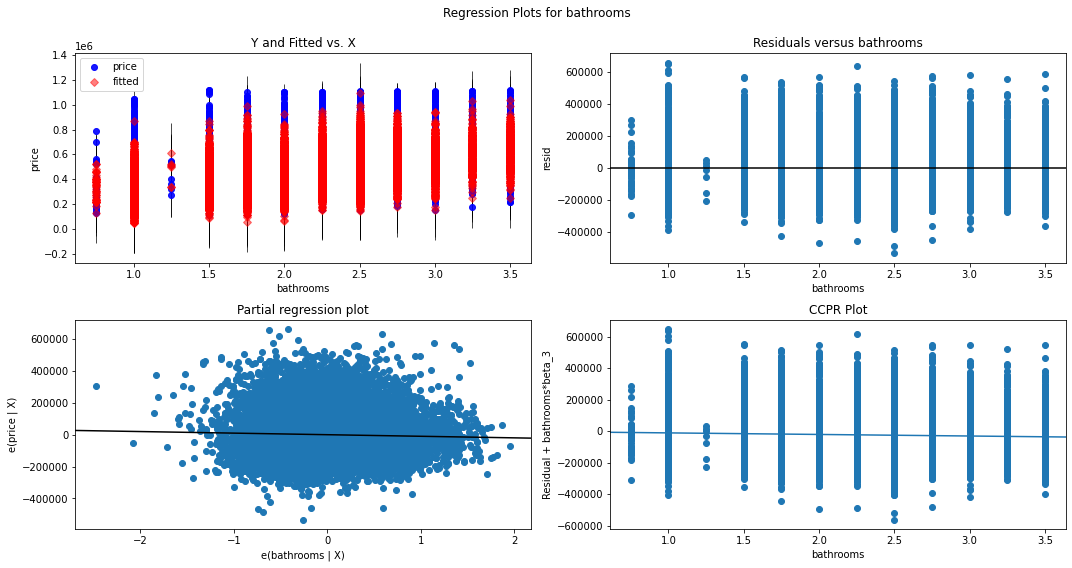

In [67]:
#Bathrooms
fig_8 = plt.figure(figsize=(15,8))
fig_8 = sm.graphics.plot_regress_exog( model_2,'bathrooms',fig=fig_8)
plt.show()

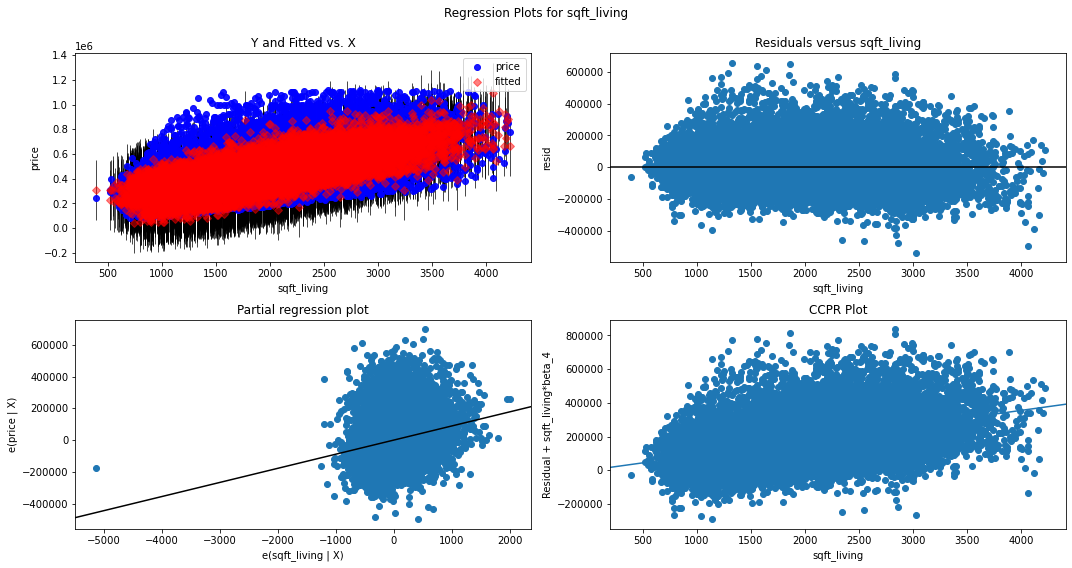

In [68]:
#sqft_living
fig_9 = plt.figure(figsize=(15,8))
fig_9 = sm.graphics.plot_regress_exog( model_2,'sqft_living',fig=fig_9)
plt.show()

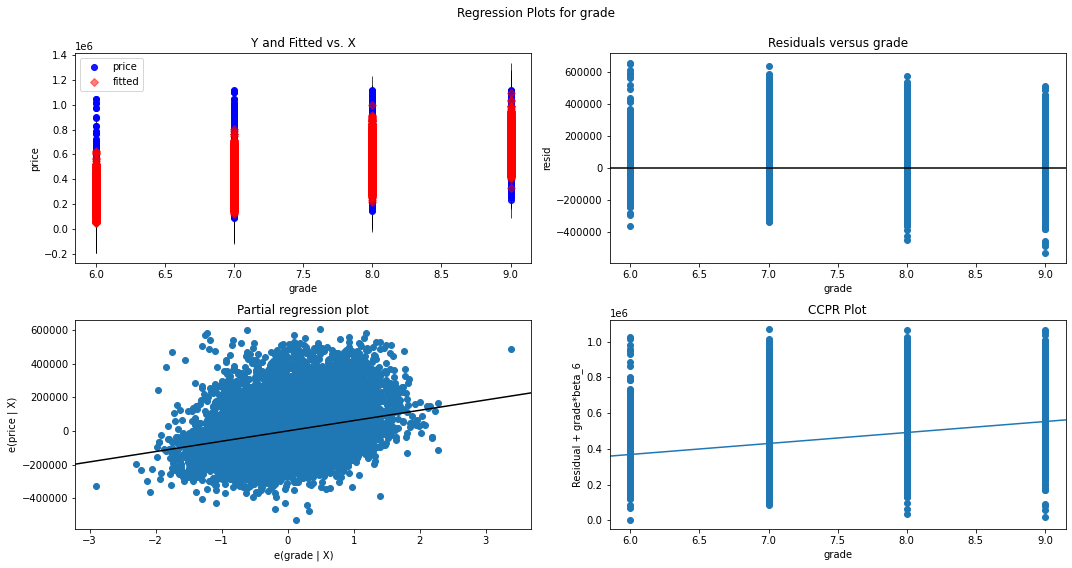

In [69]:
#grade
fig_10 = plt.figure(figsize=(15,8))
fig_10 = sm.graphics.plot_regress_exog( model_2,'grade',fig=fig_10)
plt.show()

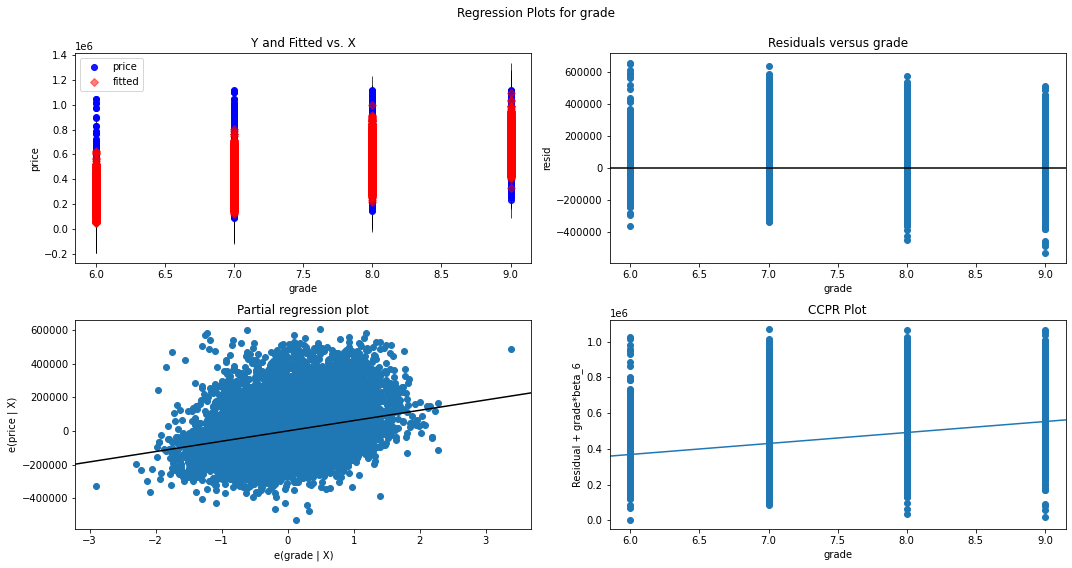

In [70]:
#sqft_living15
fig_11 = plt.figure(figsize=(15,8))
fig_11 = sm.graphics.plot_regress_exog( model_2,'grade',fig=fig_11)
plt.show()

**Check the normality assumptions by creating a QQ-plot**

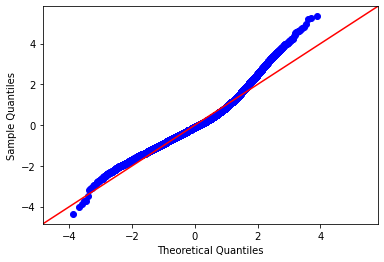

In [71]:
resid = model_2.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

Looking at this model 2, our adjusted R2 value has reduced. Our RSME is very high and test mean error is higher than train mean error meaning our model is overfitting. However, we can see that our model all have improved in their linearity and homoscedasticity. Let's transform our features to see if we can improve our model.

**Log Transformation**

- Before log transformation 

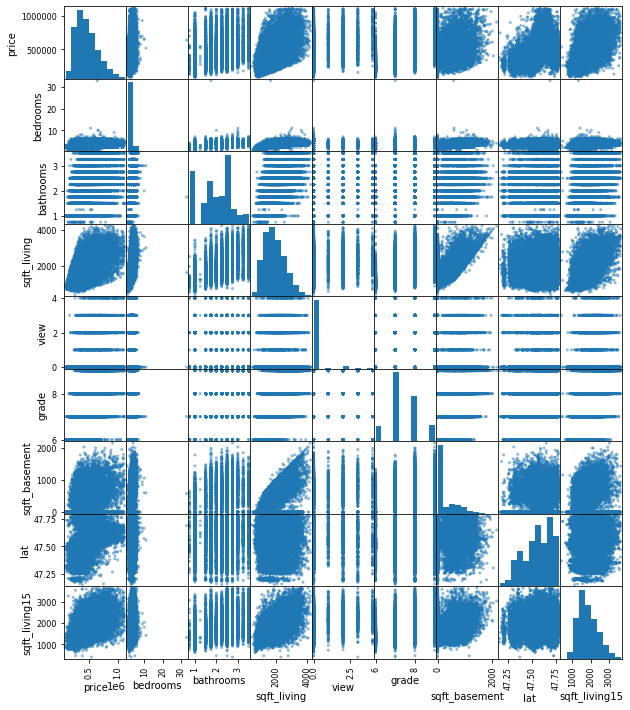

In [72]:
features = non_colin_df.drop(['id'], axis=1)
pd.plotting.scatter_matrix(features, figsize=(10,12));

- After log transformation
- Bathrooms is not being transformed because it look pretty normal from our residual plots

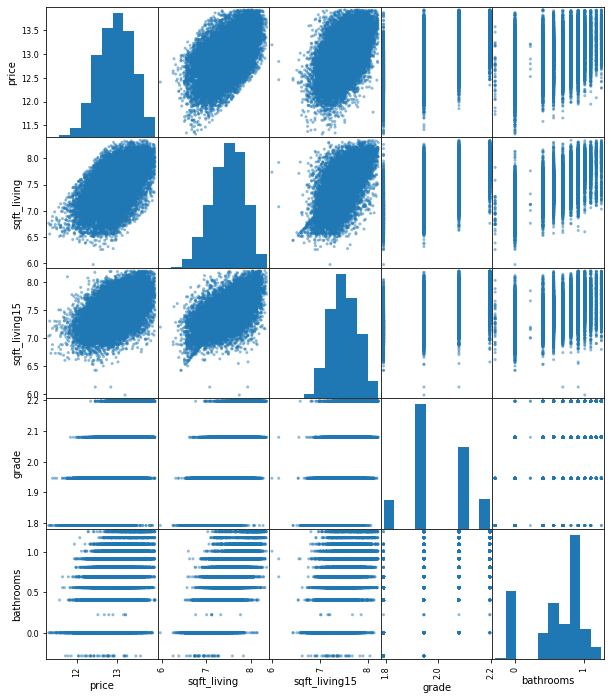

In [73]:
non_normal = ['price','sqft_living', 'sqft_living15', 'grade', 'bathrooms']
for feat in non_normal:
    non_colin_df[feat] = non_colin_df[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(non_colin_df[non_normal], figsize=(10,12));

**Model 3**
- This model is built with features after log transformation 

In [74]:
outcome = 'price'
predictors = non_colin_df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_3 = ols(formula=formula, data=non_colin_df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     3594.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:03:07   Log-Likelihood:                -1050.0
No. Observations:               18945   AIC:                             2120.
Df Residuals:                   18935   BIC:                             2198.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -62.5265      0.637    -98.155      0.000     -63.775     -61.278
id             3.612e-13   6.48e-13      0.557      0.577   -9.09e-13    1.63e-12
bedrooms         -0.0139      0.003     -5.173      0.000      -0.019      -0.009
bathrooms        -0.0195      0.007     -2.615      0.009      -0.034      -0.005
sqft_living       0.3644      0.011     34.072      0.000       0.343       0.385
view              0.0877      0.003     27.863      0.000       0.082       0.094
grade             0.9622      0.024     39.753      0.000       0.915       1.010
sqft_basement   2.34e-05   5.52e-06      4.237      0.000    1.26e-05    3.42e-05
lat               1.4642      0.013    109.651      0.000       1.438       1.490
sqft_living15     0.1643      0.009     17.310      0.000       0.146       0.183
==============================================================================
Omnibus:                      119.695   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.628
Skew:                           0.024   Prob(JB):                     1.63e-39
Kurtosis:                       3.473   Cond. No.                     1.87e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
X_3 = non_colin_df.drop('price', axis=1)
y_3 = non_colin_df['price']
X3_train, X3_test, y3_train, y3_test = train_test_split(X_3,y_3, random_state=22)
model_3k = LinearRegression()
model_3k.fit(X3_train, y3_train)

y3_hat_train = model_3k.predict(X2_train)
y3_hat_test = model_3k.predict(X2_test)

from sklearn.metrics import mean_squared_error
train_mse_3 = mean_squared_error(y3_train, y3_hat_train)
test_mse_3 = mean_squared_error(y3_test, y3_hat_test)
RSME_3 = test_mse_3 - train_mse_3
print('Train Mean Squared Error:', train_mse_3)
print('Test Mean Squared Error:', test_mse_3)
print('RMSE:', RSME_3)

Train Mean Squared Error: 1042826.3446547193
Test Mean Squared Error: 1043248.6274588677
RMSE: 422.2828041483881


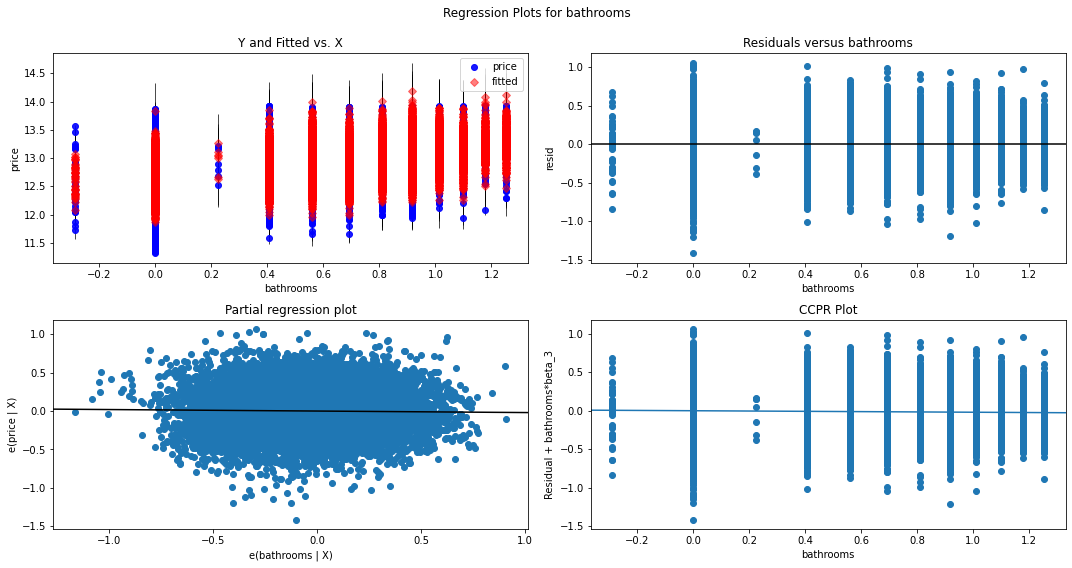

In [76]:
fig_12 = plt.figure(figsize=(15,8))
fig_12 = sm.graphics.plot_regress_exog( model_3,'bathrooms',fig=fig_12)
plt.show()

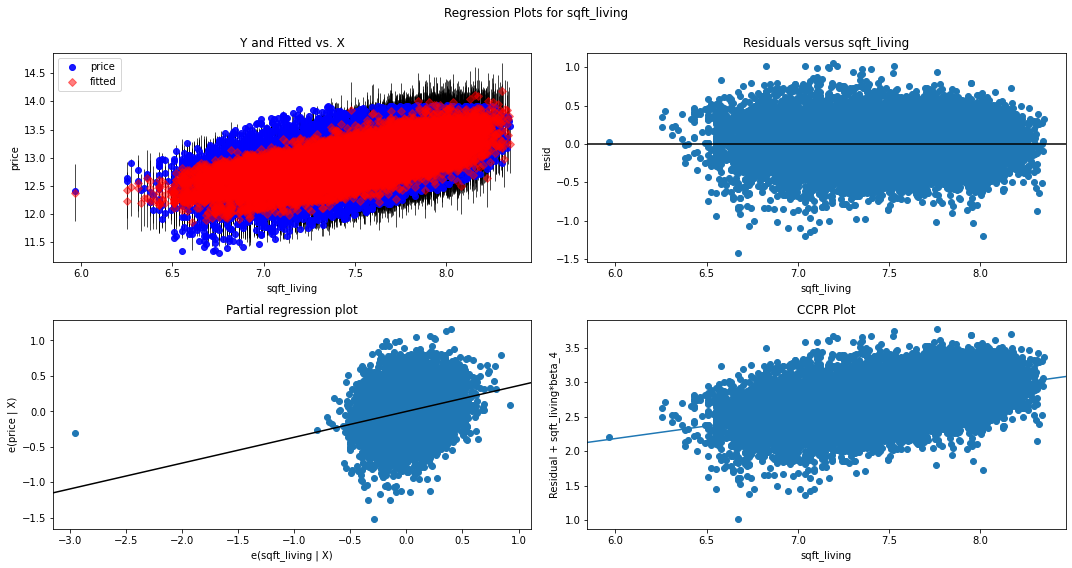

In [77]:
fig_13 = plt.figure(figsize=(15,8))
fig_13 = sm.graphics.plot_regress_exog( model_3,'sqft_living',fig=fig_13)
plt.show()

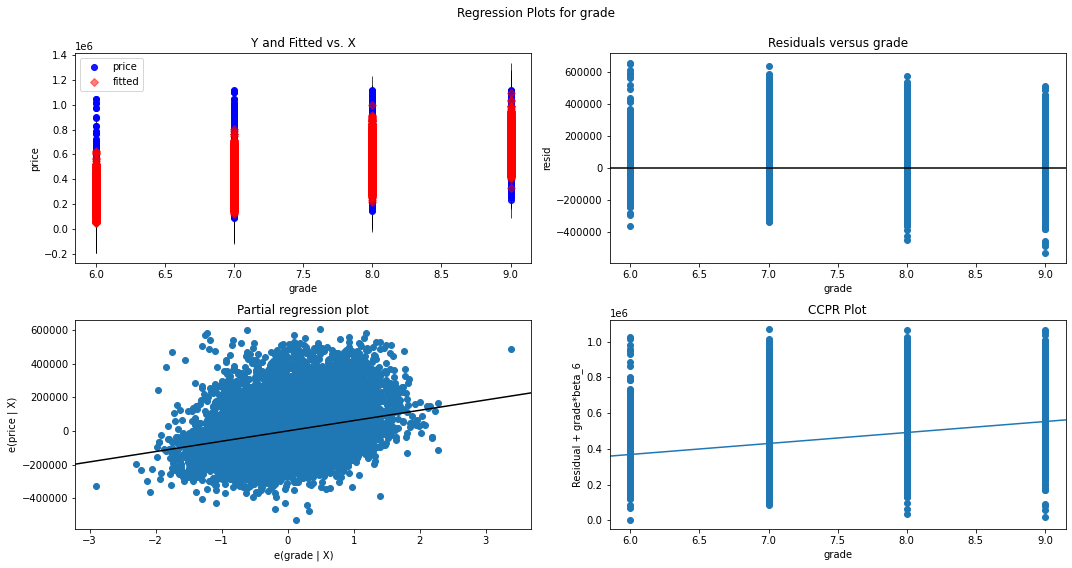

In [78]:
fig_14 = plt.figure(figsize=(15,8))
fig_14 = sm.graphics.plot_regress_exog( model_2,'grade',fig=fig_14)
plt.show()

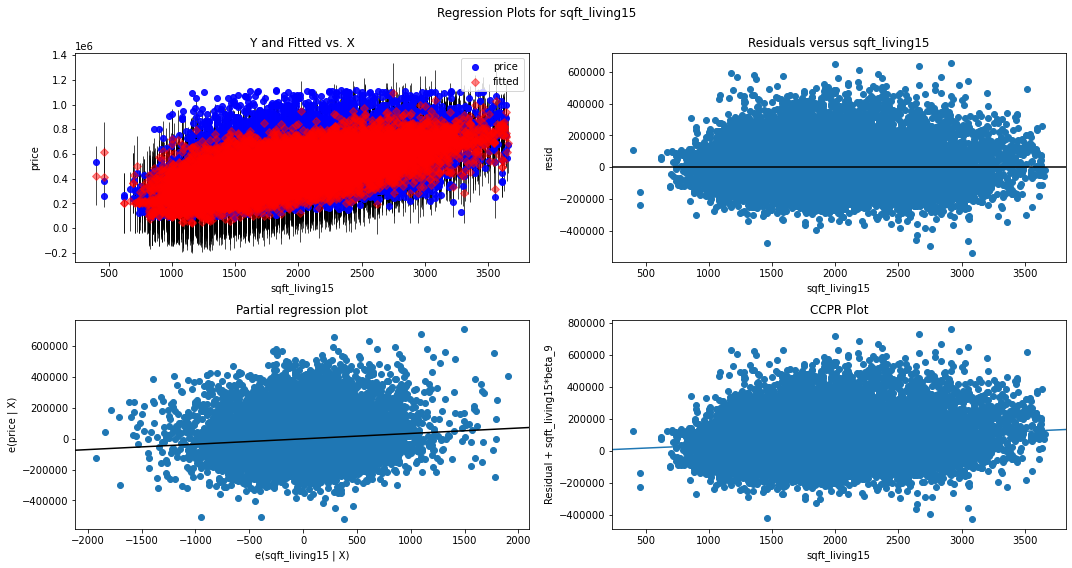

In [79]:
fig_15 = plt.figure(figsize=(15,8))
fig_15 = sm.graphics.plot_regress_exog( model_2,'sqft_living15',fig=fig_15)
plt.show()

**Check the normality assumptions by creating a QQ-plot**

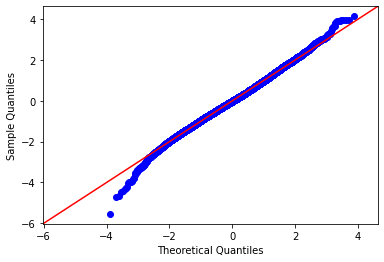

In [80]:
resid = model_3.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

Log transforming our model makes our model more accurate. RMSE now reduce to 350.31.

**Standard Scaling**

In [81]:
sqft_living_log = non_colin_df['sqft_living']
sqft_living15_log = non_colin_df['sqft_living15']
bathrooms_log = non_colin_df['bathrooms']
bathrooms_log = non_colin_df['grade']

scaled_sqft_living = (sqft_living_log - np.mean(sqft_living_log)) / np.sqrt(np.var(sqft_living_log))
scaled_sqft_living15 = (sqft_living15_log - np.mean(sqft_living15_log)) / np.sqrt(np.var(sqft_living15_log))
scaled_bathrooms = (bathrooms_log - np.mean(bathrooms_log)) / np.sqrt(np.var(bathrooms_log))
scaled_grade = (bathrooms_log - np.mean(bathrooms_log)) / np.sqrt(np.var(bathrooms_log))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['sqft_living_sc'] = scaled_sqft_living
data_cont_scaled['sqft_living15_sc'] = scaled_sqft_living15
data_cont_scaled['bathroom_sc'] = scaled_bathrooms
data_cont_scaled['grade_sc'] = scaled_grade

price_df = non_colin_df['price']

final_df = pd.concat((price_df,data_cont_scaled), axis=1)
final_df

price  sqft_living_sc  sqft_living15_sc  bathroom_sc  grade_sc
0      12.309982       -1.128719         -1.006443    -0.477879 -0.477879
1      13.195614        1.019843         -0.192494    -0.477879 -0.477879
2      12.100712       -2.307017          1.476743    -1.863078 -1.863078
3      13.311329        0.271919         -0.954479    -0.477879 -0.477879
4      13.142166       -0.153577          0.028683     0.722034  0.722034
...          ...             ...               ...          ...       ...
21592  12.793859       -0.411733         -0.541354     0.722034  0.722034
21593  12.899220        0.725438          0.086660     0.722034  0.722034
21594  12.904459       -1.530922         -1.963527    -0.477879 -0.477879
21595  12.899220       -0.288250         -0.827840     0.722034  0.722034
21596  12.691580       -1.530922         -1.963527    -0.477879 -0.477879

[18945 rows x 5 columns]

**Final model**
- This model has all continuous variables log transformed and standardised
- This model treating bathrooms and grade as continuous variables

In [82]:
outcome = 'price'
predictors = final_df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_4 = ols(formula=formula, data=final_df).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     3689.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:03:17   Log-Likelihood:                -6128.9
No. Observations:               18945   AIC:                         1.227e+04
Df Residuals:                   18941   BIC:                         1.230e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.9502      0.002   5329.884      0.000      12.945      12.955
sqft_living_sc       0.1088      0.004     29.947      0.000       0.102       0.116
sqft_living15_sc     0.0477      0.003     13.722      0.000       0.041       0.054
bathroom_sc          0.0672      0.002     41.346      0.000       0.064       0.070
grade_sc             0.0672      0.002     41.346      0.000       0.064       0.070
==============================================================================
Omnibus:                      210.682   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.179
Skew:                          -0.055   Prob(JB):                     2.69e-30
Kurtosis:                       2.600   Cond. No.                     1.75e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.89e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
X_4 = final_df.drop('price', axis=1)
y_4 = final_df['price']
X4_train, X4_test, y4_train, y4_test = train_test_split(X_4,y_4, random_state=68)
model_4k = LinearRegression()
model_4k.fit(X4_train, y4_train)

y4_hat_train = model_4k.predict(X4_train)
y4_hat_test = model_4k.predict(X4_test)

from sklearn.metrics import mean_squared_error
train_mse_4 = mean_squared_error(y4_train, y4_hat_train)
test_mse_4 = mean_squared_error(y4_test, y4_hat_test)
RSME_4 = test_mse_4 - train_mse_4
print('Train Mean Squared Error:', train_mse_4)
print('Test Mean Squared Error:', test_mse_4)
print('RMSE:', RSME_4)

Train Mean Squared Error: 0.11151792401428043
Test Mean Squared Error: 0.11273874336082608
RMSE: 0.0012208193465456513


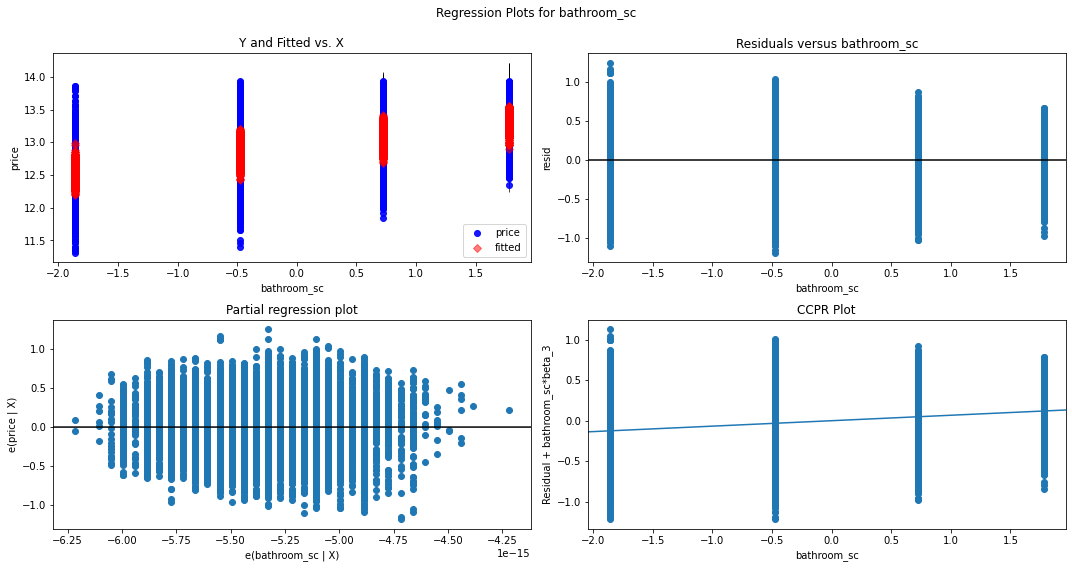

In [84]:
#bathrooms
fig_16 = plt.figure(figsize=(15,8))
fig_16 = sm.graphics.plot_regress_exog( model_4,'bathroom_sc',fig=fig_16)
plt.show()

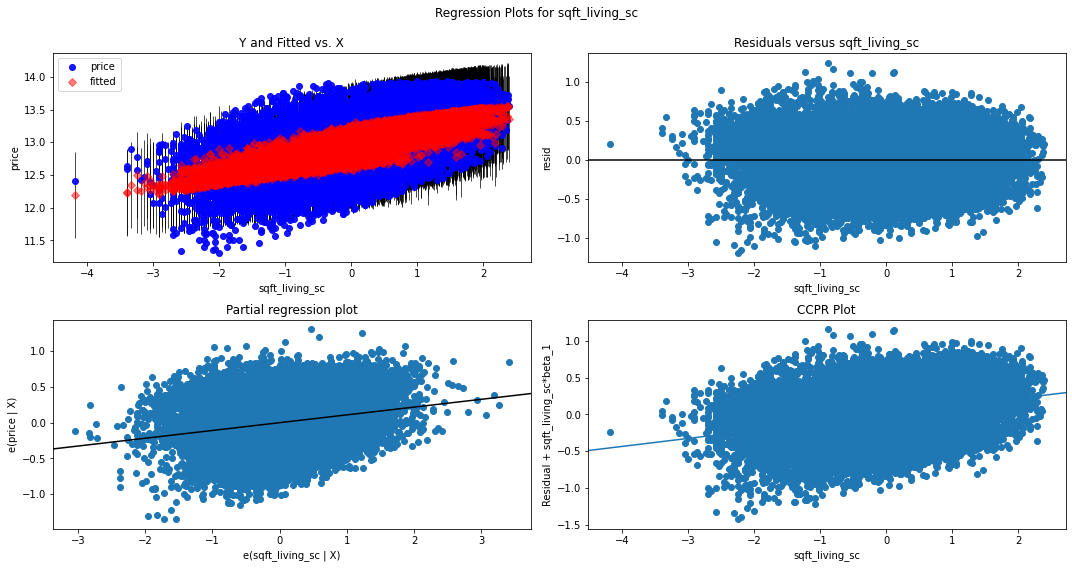

In [85]:
#sqft_living
fig_17 = plt.figure(figsize=(15,8))
fig_17 = sm.graphics.plot_regress_exog( model_4,'sqft_living_sc',fig=fig_17)
plt.show()

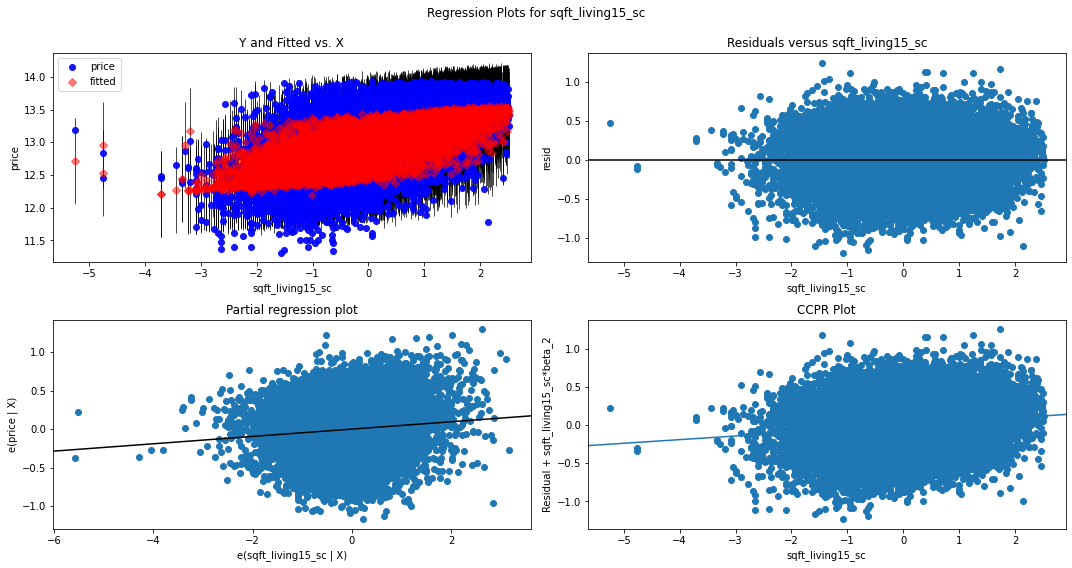

In [86]:
#sqft_living15
fig_18 = plt.figure(figsize=(15,8))
fig_18 = sm.graphics.plot_regress_exog( model_4,'sqft_living15_sc',fig=fig_18)
plt.show()

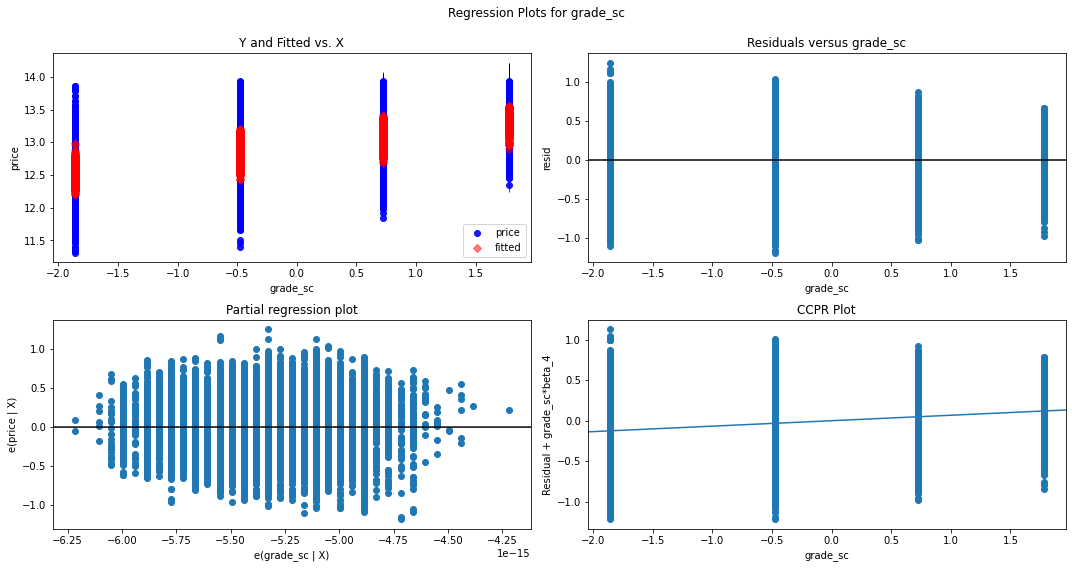

In [87]:
#grade
fig_19 = plt.figure(figsize=(15,8))
fig_19 = sm.graphics.plot_regress_exog( model_4,'grade_sc',fig=fig_19)
plt.show()

**Check the normality assumptions by creating a QQ-plot**

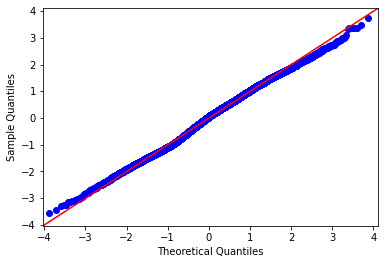

In [88]:
resid = model_4.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

**Cross validation**

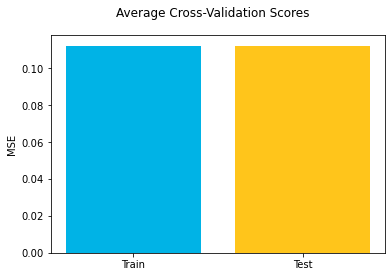

In [89]:
from sklearn.model_selection import cross_validate

linreg = LinearRegression()

X = final_df.drop('price', axis=1)
y = final_df['price']

cross_val_results = cross_validate(linreg, X, y, scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]
fig_20, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig_20.suptitle("Average Cross-Validation Scores");

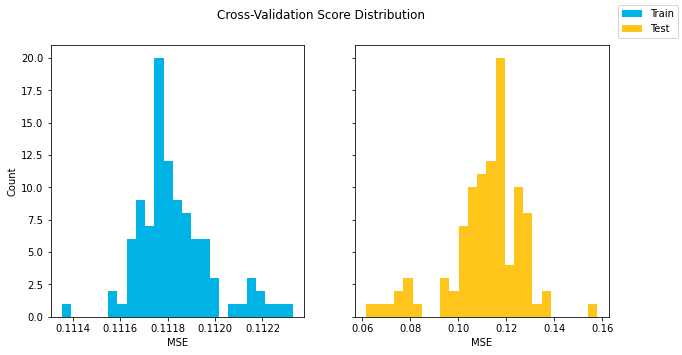

In [90]:
cross_val_results = cross_validate(linreg, X, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)
train_scores = -cross_val_results["train_score"]
test_scores = -cross_val_results["test_score"]

fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
bins=25
left.hist(train_scores, label=labels[0], bins=bins, color=colors[0])
left.set_ylabel("Count")
left.set_xlabel("MSE")
right.hist(test_scores, label=labels[1], bins=bins, color=colors[1])
right.set_xlabel("MSE")
fig.suptitle("Cross-Validation Score Distribution")
fig.legend();

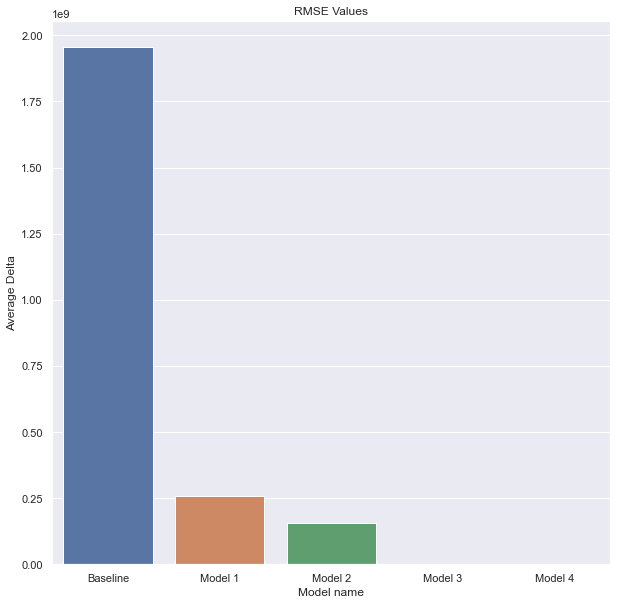

In [93]:
RMSE_values = [RSME_0, RSME_1, RSME_2, RSME_3, RSME_4 ]
baseline_names =['Baseline', 'Model 1', 'Model 2', 'Model 3', 'Model 4']


plt.bar(baseline_names, height=RMSE_values)
plt.title('RMSE Values')
plt.xlabel('Model name')
plt.ylabel('Average Delta')

;

sns.set(rc = {'figure.figsize':(10,10)})
sns.barplot(x=baseline_names, y=RMSE_values).set(title='RMSE Values', xlabel='Model name', ylabel='Average Delta');

## Evaluation
Evaluate how well your work solves the stated business problem.
The final model was able to have almost no difference between the test and train group which means that within linear regression this model is very accurate. However adjusted R value is only 0.369 which means that this model can only explain 36.9% changes in the dependent variable i.e it can only explain 36.9% of the property sale price which is low. Perhaps linear regression is not suitable for this data set. I am confident that this model is accurate based on RSME results from cross validation however the model requires more data and also a more suitable regression model to be able to model the dataset more accurately. 

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***